In [2]:
import csv
import locale
import time
from datetime import datetime

locale.setlocale(locale.LC_ALL, '')
timeFactor = lambda x: round(-0.2369935 + (0.981336 + 0.2369935)/(1 + pow((x/2.542431), 3.1187)), 3)

def yearsFromDate(dateString):
    date = datetime.strptime(dateString, "%m/%d/%Y")
    diff = datetime.utcnow() - date 
    return round(diff.days / 365, 2)

def getNumEmployees(employeesString):
    if '+' in employeesString:
        return employeesString[:employeesString.index('+')]
    return employeesString[employeesString.index('-') + 1:] if '-' in employeesString else "10000"

with open ('new_top_companies.csv', 'r') as file:
    reader = csv.DictReader(file)
    companies = [row for row in reader]
for company in companies:
    status = company['Last Funding Type'] if company['Status'] != 'IPO' else company['Status']
    time_weight = timeFactor(yearsFromDate(company['Last Funding Date'])) if status != 'IPO' else 1
    total_funding = round(locale.atof(company['Total Equity Funding Amount'][1:])/1000000, 2)
    num_employees = int(getNumEmployees(company['Number of Employees']))
    score = round(total_funding * time_weight / num_employees, 3)
    company['Score'] = str(score)
    
for company in companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

SpaceX | $1,495,560,000 | 1001-5000 | 0.293
BuzzFeed | $496,300,000 | 501-1000 | 0.46
Uber | $8,812,450,000 | 5001-10000 | 0.856
HubSpot | $100,500,000 | 501-1000 | 0.101
DJI | $105,000,000 |  | 0.004
Symantec | $503,000,000 | 10001+ | 0.05
Redfin | $167,820,000 | 501-1000 | 0.168
GrubHub | $84,100,000 | 501-1000 | 0.084
Flipkart | $7,122,140,000 | 10001+ | 0.699
Yelp | $56,000,000 | 501-1000 | 0.056
WeWork | $9,853,784,331 | 501-1000 | 9.667
Databricks | $247,000,000 | 101-250 | 0.969
ThoughtSpot | $150,700,000 | 101-250 | 0.591
Hyperloop One | $141,100,000 | 101-250 | 0.512
Groupon | $1,387,000,000 | 1001-5000 | 0.277
Impossible Foods | $257,000,000 | 101-250 | 1.007
Lyft | $2,612,500,000 | 1001-5000 | 0.507
Outbrain | $194,000,000 | 501-1000 | 0.153
TuneIn | $103,122,231 | 51-100 | 1.012
Zillow | $96,627,980 | 1001-5000 | 0.019


In [3]:
companies.sort(key=lambda x: float(x['Score']), reverse=True)
for company in companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Ele.me | $3,335,000,000 | 11-50 | 65.166
Filecoin | $252,120,000 | 1-10 | 24.733
Wish | $1,078,700,000 | 11-50 | 19.805
Jiuxian.com | $249,963,505 | 1-10 | 11.973
Expa | $150,000,000 | 1-10 | 11.235
Ionic Security | $122,440,001 | 1-10 | 9.893
WeWork | $9,853,784,331 | 501-1000 | 9.667
Genalyte | $91,800,000 | 1-10 | 8.501
Calient Technologies | $405,118,814 | 11-50 | 7.041
ARMO BioSciences | $100,000,000 | 1-10 | 6.99
Dailyhunt | $66,643,163 | 1-10 | 6.058
Forty Seven | $75,000,000 | 1-10 | 5.362
Guardant Health | $550,000,000 | 51-100 | 5.362
Mobvoi Inc. | $252,720,178 | 11-50 | 4.898
Kabbage | $488,650,000 | 51-100 | 4.789
Editas Medicine | $210,000,000 | 11-50 | 4.2
AirMap | $43,600,000 | 1-10 | 4.186
Desktop Metal | $211,760,835 | 11-50 | 4.15
Katerra | $205,573,028 | 11-50 | 3.992
eGenesis | $40,000,000 | 1-10 | 3.86


In [4]:
sf_startups = [company for company in companies if 'San Francisco, California, United States' in company['Headquarters Location']]
for company in sf_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 19.805
Expa | $150,000,000 | 1-10 | 11.235
Digit | $36,300,000 | 1-10 | 2.944
Pinterest | $1,466,100,000 | 251-500 | 2.865
Instabase | $26,970,000 | 1-10 | 2.638
Instacart | $674,800,000 | 101-250 | 2.599
Vicarious | $122,000,000 | 11-50 | 2.391
Invuity | $106,999,999 | 11-50 | 2.14
Airware | $109,550,000 | 11-50 | 2.092
Mavrx | $22,420,781 | 1-10 | 2.004
Amitree | $19,828,000 | 1-10 | 1.945
SoFi | $1,878,226,991 | 501-1000 | 1.805
Autonomic Technologies | $136,200,000 | 11-50 | 1.787
Discord | $79,300,000 | 11-50 | 1.55
Five Prime Therapeutics | $155,040,487 | 51-100 | 1.55
Affirm | $420,000,000 | 101-250 | 1.524
Freenome | $77,550,000 | 11-50 | 1.522
Netlify | $14,100,000 | 1-10 | 1.383
Houseparty | $73,200,000 | 11-50 | 1.369
Anki | $157,500,000 | 51-100 | 1.307


In [5]:
fintech_startups = [company for company in companies if 'FinTech' in company['Categories']]
for company in fintech_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Kabbage | $488,650,000 | 51-100 | 4.789
Cadre | $133,300,000 | 11-50 | 2.605
PPDai | $70,200,000 | 1-10 | 2.492
BlueVine | $113,000,000 | 11-50 | 2.174
SoFi | $1,878,226,991 | 501-1000 | 1.805
Samlino.dk | $20,463,040 | 1-10 | 1.798
Blockstream | $126,000,000 | 11-50 | 1.744
Robinhood | $176,000,000 | 51-100 | 1.711
Affirm | $420,000,000 | 101-250 | 1.524
Behalf | $156,000,000 | 51-100 | 1.371
Blockchain | $70,000,000 | 11-50 | 1.369
Hyper Anna | $13,644,766 | 1-10 | 1.338
Circle | $136,000,000 | 51-100 | 1.125
Trumid Financial | $54,250,000 | 11-50 | 1.062
Quantopian | $48,800,000 | 11-50 | 0.902
PLASTIQ | $45,349,996 | 11-50 | 0.89
Capital Float | $88,530,456 | 51-100 | 0.868
Coinbase | $217,209,590 | 101-250 | 0.852
Veem | $44,250,000 | 11-50 | 0.852
Upstart | $85,650,000 | 51-100 | 0.824


In [6]:
non_biotech_companies = [company for company in companies if 'Biotechnology' not in company['Categories']]
for company in non_biotech_companies[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Ele.me | $3,335,000,000 | 11-50 | 65.166
Filecoin | $252,120,000 | 1-10 | 24.733
Wish | $1,078,700,000 | 11-50 | 19.805
Jiuxian.com | $249,963,505 | 1-10 | 11.973
Expa | $150,000,000 | 1-10 | 11.235
Ionic Security | $122,440,001 | 1-10 | 9.893
WeWork | $9,853,784,331 | 501-1000 | 9.667
Calient Technologies | $405,118,814 | 11-50 | 7.041
Dailyhunt | $66,643,163 | 1-10 | 6.058
Mobvoi Inc. | $252,720,178 | 11-50 | 4.898
Kabbage | $488,650,000 | 51-100 | 4.789
AirMap | $43,600,000 | 1-10 | 4.186
Desktop Metal | $211,760,835 | 11-50 | 4.15
Katerra | $205,573,028 | 11-50 | 3.992
Go-Jek | $1,750,000,000 | 251-500 | 3.409
Nauto, Inc. | $173,850,000 | 11-50 | 3.407
cheddar | $32,000,000 | 1-10 | 3.12
Digit | $36,300,000 | 1-10 | 2.944
Pinterest | $1,466,100,000 | 251-500 | 2.865
Tokopedia | $1,347,700,000 | 251-500 | 2.644


In [7]:
mobile_startups = [company for company in companies if 'Mobile' in company['Category Groups'] and 'United States' in company['Headquarters Location']]
for company in mobile_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 19.805
Expa | $150,000,000 | 1-10 | 11.235
Nauto, Inc. | $173,850,000 | 11-50 | 3.407
Joya Communications | $25,000,000 | 1-10 | 2.315
ooma | $95,432,819 | 11-50 | 1.909
Skydio | $28,000,000 | 1-10 | 1.848
Robinhood | $176,000,000 | 51-100 | 1.711
Discord | $79,300,000 | 11-50 | 1.55
Houseparty | $73,200,000 | 11-50 | 1.369
Onshape | $169,000,000 | 51-100 | 1.289
Branch | $113,050,000 | 51-100 | 1.097
AISense Inc. | $11,200,000 | 1-10 | 1.09
TuneIn | $103,122,231 | 51-100 | 1.012
Getaround | $101,299,999 | 51-100 | 0.985
Zeel | $13,200,000 | 1-10 | 0.978
Zugata | $10,200,000 | 1-10 | 0.942
Amino | $45,000,000 | 11-50 | 0.872
Uber | $8,812,450,000 | 5001-10000 | 0.856
Tala (formerly InVenture) | $44,439,706 | 11-50 | 0.853
Puls | $43,000,000 | 11-50 | 0.844


In [8]:
data_startups = [company for company in companies if 'Data and Analytics' in company['Category Groups']]
for company in data_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

Wish | $1,078,700,000 | 11-50 | 19.805
Mobvoi Inc. | $252,720,178 | 11-50 | 4.898
AirMap | $43,600,000 | 1-10 | 4.186
Instabase | $26,970,000 | 1-10 | 2.638
Vicarious | $122,000,000 | 11-50 | 2.391
Mavrx | $22,420,781 | 1-10 | 2.004
Farmers Business Network | $83,900,000 | 11-50 | 1.616
Orbital Insight, Inc. | $78,700,000 | 11-50 | 1.532
Color Genomics | $150,548,112 | 51-100 | 1.477
Hyper Anna | $13,644,766 | 1-10 | 1.338
Anki | $157,500,000 | 51-100 | 1.307
Lemonade | $60,000,000 | 11-50 | 1.166
Versive | $57,000,000 | 11-50 | 1.118
Branch | $113,050,000 | 51-100 | 1.097
Cockroach Labs | $53,500,000 | 11-50 | 1.042
Databricks | $247,000,000 | 101-250 | 0.969
Elastifile | $58,000,000 | 11-50 | 0.951
Solarflare Communications | $251,971,379 | 101-250 | 0.938
Sumo Logic | $230,000,000 | 101-250 | 0.901
Bitly | $91,500,000 | 51-100 | 0.896


In [9]:
nyc_startups = [company for company in companies if 'New York' in company['Headquarters Location']]
for company in nyc_startups[:20]:
    print(company['Company Name'] + " | " + company['Total Equity Funding Amount'] + " | " + company['Number of Employees'] + " | " + company['Score'])

WeWork | $9,853,784,331 | 501-1000 | 9.667
cheddar | $32,000,000 | 1-10 | 3.12
Cadre | $133,300,000 | 11-50 | 2.605
Casper | $239,700,000 | 51-100 | 2.344
Common | $23,350,000 | 1-10 | 1.915
Spring Inc | $97,500,000 | 11-50 | 1.901
Peloton | $444,707,000 | 101-250 | 1.736
Blink Health | $165,000,000 | 51-100 | 1.602
letgo | $375,000,000 | 101-250 | 1.423
Giphy | $150,949,998 | 51-100 | 1.384
Behalf | $156,000,000 | 51-100 | 1.371
Beeswax | $13,300,000 | 1-10 | 1.18
Lemonade | $60,000,000 | 11-50 | 1.166
MakeSpace | $57,600,000 | 11-50 | 1.12
Trumid Financial | $54,250,000 | 11-50 | 1.062
Cockroach Labs | $53,500,000 | 11-50 | 1.042
Oscar | $727,500,000 | 251-500 | 1.035
Ellevest | $51,458,913 | 11-50 | 1.01
The Farmer's Dog | $10,100,000 | 1-10 | 0.985
Zeel | $13,200,000 | 1-10 | 0.978


In [10]:
import pandas as pd

data = pd.read_csv('company_talent.csv', index_col = False)
data.columns = ['company_name', 'num_employees', 'past_companies', 'past_schools']

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [11]:
data.dropna(how='any')
data.drop_duplicates(subset=['company_name']).head(10)

,company_name,num_employees,past_companies,past_schools
0,Affirm,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California,..."
1,Flexport,446,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California, Berkeley, Stanford U..."
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California,..."
4,Lemonade Inc,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ..."
5,Ripple,208,"Ripple, HSBC, Morgan Stanley, Citi, Accenture","University of California, Berkeley, Stanford U..."
6,Cadre,88,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University..."
7,Zocdoc,588,"Zocdoc, Apple, Microsoft, Yodle, Arizona State...","Arizona State University, Cornell University, ..."
8,Sourcegraph,21,"Google, Stanford University, LinkedIn, Bain & ...","Stanford University, Emerson College, Vanderbi..."
9,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl..."


In [12]:
past_schools_column = []
school_prefixes = ['University of California', 'California State University', 'Indian Institute of Technology']
for index, school_string in enumerate(data.past_schools):
    if not isinstance(school_string, str):
        data.drop(index, inplace=True)
        continue
    schools = school_string.split(',') 
    for k, v in enumerate(schools):
        v = v.strip()
        if any(school_prefix == v for school_prefix in school_prefixes):
            if k + 1 < len(schools):
                schools[k] += schools[k+1]
                schools[k].strip()
                del(schools[k+1])
        if v == 'Haas School of Business':
            schools[k - 1] += schools[k]
            del(schools[k])
    past_schools_column.append(','.join(schools))
data.past_schools = past_schools_column

In [13]:
stanford_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_startups.tail(5)

,company_name,num_employees,past_companies,past_schools
1660,21.co,26,"Counsyl, OpenGov Inc., 21.co, Merrill Lynch, H...","Stanford University, Massachusetts Institute o..."
1672,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1681,DivvyHomes,5,"DoubleDutch, SpaceX, Square, Microsoft, Merril...","Stanford University, Cornell University, Calif..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
1687,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ..."


In [14]:
stanford_startups = stanford_startups[(stanford_startups.num_employees > 10) & (stanford_startups.num_employees < 300)]
stanford_startups.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
805,Newsela,206,"Newsela, Teach For America, Stanford Universit...","Stanford University, New York University, Hunt..."
222,Instart Logic,210,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, University of California ..."
166,Change.org,217,"Change.org, Zynga, Greenpeace, Cisco, Plan Int...","Stanford University, University of California ..."
424,Honor,218,"Google, Meebo, Apple, Home Instead Senior Care...","Stanford University, Stanford University Gradu..."
21,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University..."
452,Doctor On Demand,233,"vRad (Virtual Radiologic), Castlight Health, P...","Stanford University, New York University, Univ..."
640,Hearsay Systems,253,"Hearsay Systems, Microsoft, Google, Salesforce...","Stanford University, University of California ..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
0,Affirm,281,"Google, Affirm, Inc., LinkedIn, Stanford Unive...","Stanford University, University of California ..."


In [15]:
stanford_startups.sort_values('num_employees').head(15)

,company_name,num_employees,past_companies,past_schools
994,Gixo,14,"SurveyMonkey, TRX Training, Wilkes Barre Power...","Stanford University, Brigham Young University,..."
787,Joya Communications,14,"Microsoft, Clarion University of Pennsylvania,...",Stanford University Graduate School of Busines...
1241,Boom Fantasy,14,"IAF - Israeli Air Force, Carestream, High 5 Ga...",Stanford University Graduate School of Busines...
868,Ascend.io,14,"Microsoft, IBM, Ooyala, Oracle, Extole","Stanford University, University of California ..."
1207,Sherpaa,15,"GE Healthcare, Personal, Hello Health Inc., Lo...","Stanford University, The Johns Hopkins Univers..."
1656,Shogun Enterprises,15,"Northwestern University, Stanford University, ...","Stanford University, Northwestern University, ..."
1204,Invicta Medical,16,"BlackBerry, Medconx, Inc., Singularity Univers...","Stanford University, University of Southern Ca..."
811,AISense Inc.,16,"Yahoo! Inc., Knowles Intelligent Audio, Google...","Stanford University, Nankai University, Peking..."
772,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
429,LiftIgniter,17,"Act-On Software, Inc., Seagate Technology, Web...","Stanford University, Princeton University, The..."


In [16]:
former_palantir = data[data.past_companies.str.contains('Palantir Technologies', na=False)]
former_palantir

,company_name,num_employees,past_companies,past_schools
2,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca..."
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
406,MemSQL,120,"Oracle, Microsoft, MemSQL, Palantir Technologi...","Stanford University, Carnegie Mellon Universit..."
670,Handshake,82,"Michigan Technological University, Google, Pal...","Michigan Technological University, Stanford Un..."
924,Alluxio,23,"Microsoft, Google, Palantir Technologies, Broc...","Carnegie Mellon University, Tsinghua Universit..."
1264,Asana,338,"Asana, Google, Facebook, Apple, Palantir Techn...","Stanford University, Cornell University, Unive..."
1452,Palantir Technologies,1992,"Palantir Technologies, Google, Microsoft, Stan...","Stanford University, Cornell University, Massa..."
1648,Socotra,45,"Palantir Technologies, Carnegie Mellon Univers...","University of California Berkeley, Stanford Un..."


In [17]:
ex_bridgewater = data[data.past_companies.str.contains('Bridgewater', na=False)]
ex_bridgewater

,company_name,num_employees,past_companies,past_schools
138,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ..."
368,Domino Data Lab,72,"Bridgewater Associates, FactSet, Platfora (Acq...","Massachusetts Institute of Technology, Univers..."
877,Hello Alfred,47,"SoulCycle Inc., Bridgewater Associates, McKins...","New York University, Boston University, Harvar..."
912,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."
975,HealthSherpa,20,"Carter's | OshKosh B'gosh, HealthSTAR Communic...","California State University-Sacramento, Yale U..."
1007,OpenInvest,14,"Bridgewater Associates, World Wildlife Fund, L...","The Johns Hopkins University, Cornell Universi..."
1488,Hubble Contacts,15,"Starbucks, Panaya, Hubble Contacts, Bridgewate...","Hunter College, Columbia University in the Cit..."
1515,MediaSpike,9,"Wolfram, HMC Electronics, A Division of Hisco,...","Lodz University of Technology, University of I..."
1649,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka..."
1685,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo..."


In [18]:
ex_goldman = data[data.past_companies.str.contains('Goldman Sachs', na=False)]
ex_goldman = ex_goldman[ex_goldman.num_employees > 10]
ex_goldman.sort_values('num_employees')

,company_name,num_employees,past_companies,past_schools
1679,Chain,27,"Goldman Sachs, Microsoft, Wakefield Council, A...","Carnegie Mellon University, Stanford Universit..."
1373,SevenFifty,30,"SevenFifty, Goldman Sachs, Penguin Random Hous...","University of Pennsylvania, New York Universit..."
193,Ellevest,38,"Goldman Sachs, NYC Department of Parks & Recre...","University of Pennsylvania, Harvard University..."
1124,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
645,Bond Street,40,"Citi, JPMorgan Chase & Co., Deutsche Bank, Gol...","New York University, General Assembly, Harvard..."
1570,Patients Know Best,43,"Patients Know Best, Orion Health, The Janssen ...","University of Cambridge, Trinity College Dubli..."
1341,Jopwell,48,"Goldman Sachs, Morehouse College, Barnard Coll...","Morehouse College, Duke University, Princeton ..."
892,Shift Technology,67,"IBM, BearingPoint, vente-privee, Orange, Goldm...","École Polytechnique, MINES ParisTech, Universi..."
1683,Stash,82,"Stash Invest, Goldman Sachs, Voya Financial, M...","General Assembly, New York University, Brown U..."


In [19]:
ex_clarium = data[data.past_companies.str.contains('Clarium Capital', na=False)]
ex_clarium

,company_name,num_employees,past_companies,past_schools
3,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ..."
1062,Chatous,6,"Clarium Capital Management, Hanover College, I...","University of Toronto, University of Waterloo,..."
1124,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y..."
1608,Kalo,75,"Zenefits, Kalo, Cisco, Deutsche Bank, Clarium ...","University of Warwick, Boston University, Univ..."


In [20]:
ex_google = data[data.past_companies.str.contains('Google', na=False)]
ex_google.sort_values('num_employees').tail(10)

,company_name,num_employees,past_companies,past_schools
379,Square,2258,"Square, Apple, Google, Microsoft, Visa","University of California Berkeley, Stanford Un..."
43,Atlassian,2348,"Atlassian, IBM, Microsoft, Google, Macquarie G...","UNSW, University of Sydney, University of Tech..."
238,Etsy,2709,"Etsy, Google, PwC, Yahoo! Inc., Apple","New York University, Fashion Institute of Tech..."
598,Spotify,3587,"Spotify, Ericsson, Microsoft, Google, Yahoo! Inc.","KTH Royal Institute of Technology, Stockholm U..."
29,Twitter,3742,"Twitter, Google, Microsoft, Yahoo! Inc., Apple","University of California Berkeley, Stanford Un..."
67,Airbnb,6213,"Airbnb, Google, Facebook, Microsoft, Apple","University of California Berkeley, Stanford Un..."
25,Lyft,8321,"Lyft, Google, US Army, US Navy, Walmart","University of Phoenix, University of Californi..."
44,Facebook,22258,"Facebook, Microsoft, Google, Yahoo! Inc., Amazon","Stanford University, University of California ..."
11,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un..."
113,Google,80409,"Google, Microsoft, IBM, Amazon, Apple","Stanford University, University of California ..."


In [21]:
prime_startups = data[data.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0] and 'Berkeley' in x.split(',')[1])]
prime_startups.sort_values('num_employees')

,company_name,num_employees,past_companies,past_schools
772,Buoyant,17,"Twitter, Gracenote, SoundCloud, Oracle, Cisco","Stanford University, University of California ..."
904,Halo Neuroscience,26,"McKinsey & Company, Hamilton College, The Bost...","Stanford University, University of California ..."
756,Momentum Machines,28,"Stanford University, Tesla, Momentum Machines ...","Stanford University, University of California ..."
949,Brightwheel,32,"Amazon, LinkedIn, Indiegogo, NerdWallet, Soldsie","Stanford University, University of California ..."
1672,Digit.co,34,"Blurb, Square, PENSCO Trust Company, a subsidi...","Stanford University, University of California ..."
1682,Petal,39,"American Express, JPMorgan Chase & Co., Citi, ...","Stanford University, University of California ..."
1478,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ..."
1346,Vigilent,49,"Vigilent, Marine Corps Recruiting, Lockheed Ma...","Stanford University, University of California ..."
534,Navdy,54,"Cisco, Astro Studios, Navdy, 99designs, Apple","Stanford University, University of California ..."
912,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ..."


In [22]:
past_schools = []
for school in [company for company in data.past_schools]:
    past_schools.extend([s.strip() for s in school.split(',')])

In [23]:
len(set(past_schools))

1802

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Charts the 25 most common fields and their frequency
def chart_most_common(field):
    company_counter = Counter(field)
    common_companies = [company for company, count in company_counter.most_common(25)]
    common_companies_count = [count for company, count in company_counter.most_common(25)]
    
    indexes = np.arange(len(common_companies))
    width = 1

    plt.bar(indexes, common_companies_count, width)
    plt.xticks(indexes + width * 0.5, common_companies)
    plt.xticks(rotation=90)
    plt.show()

In [25]:
Counter(past_schools).most_common(20)

[('University of California Berkeley', 394),
 ('Stanford University', 366),
 ('San Jose State University', 190),
 ('San Francisco State University', 143),
 ('University of California Davis', 126),
 ('University of California Los Angeles', 119),
 ('Massachusetts Institute of Technology', 104),
 ('New York University', 101),
 ('Carnegie Mellon University', 81),
 ('University of Southern California', 78),
 ('Tel Aviv University', 74),
 ('Harvard University', 72),
 ('University of California Santa Barbara', 64),
 ('Northeastern University', 59),
 ('University of California San Diego', 57),
 ('University of Washington', 57),
 ('Cornell University', 57),
 ('California Polytechnic State University-San Luis Obispo', 56),
 ('Kendriya Vidyalaya', 55),
 ('The University of Texas at Austin', 55)]

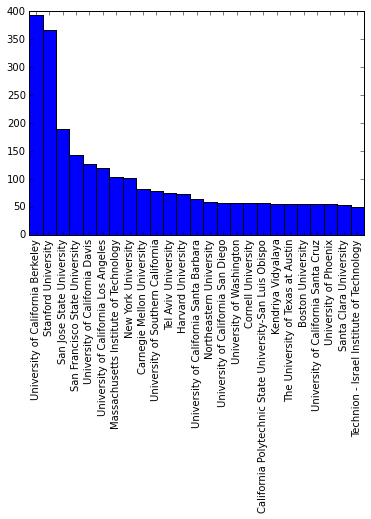

In [26]:
chart_most_common(past_schools)

In [27]:
past_companies_column = []
company_postfixes = ['Inc.']
for index, company_string in data.past_companies.items():
    if not isinstance(company_string, str):
        data.drop(index, inplace=True)
        continue
    companies = company_string.split(',')
    for k, v in enumerate(companies):
        if any(company_postfix == v.strip() for company_postfix in company_postfixes):
            companies[k - 1] += companies[k]
            del(companies[k])
    past_companies_column.append(','.join(companies))
data.past_companies = past_companies_column

In [28]:
past_companies = []
for company in [company for company in data.past_companies]:
    past_companies.extend([s.strip() for s in company.split(',')])
Counter(past_companies).most_common(20)

[('Microsoft', 230),
 ('IBM', 181),
 ('Google', 176),
 ('Oracle', 131),
 ('Hewlett Packard Enterprise', 114),
 ('Cisco', 113),
 ('Apple', 91),
 ('Yahoo! Inc.', 82),
 ('University of California', 64),
 ('Stanford University', 62),
 ('Amazon', 50),
 ('Intel Corporation', 48),
 ('Israel Defense Forces', 44),
 ('Nokia', 41),
 ('Symantec', 40),
 ('Salesforce', 38),
 ('Facebook', 37),
 ('eBay', 35),
 ('VMware', 34),
 ('LinkedIn', 32)]

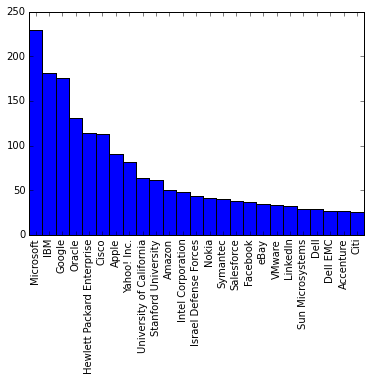

In [29]:
chart_most_common(past_companies)

In [30]:
startups = pd.read_csv('new_top_companies.csv', index_col = False)
startups.columns = ["company_name", "company_name_url", "category_groups", "headquarters_location", "description", 
                    "crunchbase_rank", "website", "last_funding_type", "last_funding_amount", "total_funding_amount", 
                    "trend_score", "employees_estimate", "categories", "founded_date", "status", "last_funding_date", 
                    "total_equity_funding_amount", "valuation_at_ipo"]
startups.head(1)

,company_name,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,employees_estimate,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
0,SpaceX,https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,Private Equity,"$350,000,000","$1,495,560,000",0.8,1001-5000,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN


In [31]:
#fuzzy match name between two tables
import difflib 

def closestName(company_name):
    matches = difflib.get_close_matches(company_name, data['company_name'])
    if len(matches) > 0:
        return matches[0]
    return company_name

startups['company_name'] = startups['company_name'].apply(lambda x: closestName(x))
startups.head()

,company_name,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,last_funding_type,last_funding_amount,total_funding_amount,trend_score,employees_estimate,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo
0,SpaceX,https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,Private Equity,"$350,000,000","$1,495,560,000",0.8,1001-5000,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN
1,BuzzFeed,https://www.crunchbase.com/organization/buzzfeed,"Media and Entertainment, Internet Services, Vi...","New York, New York, United States","BuzzFeed provides shareable breaking news, ori...",11,http://www.buzzfeed.com,Series G,"$200,000,000","$496,300,000",-0.1,501-1000,"Internet, News, Video, Digital Entertainment, ...",01/01/2006,Operating,11/18/2016,"$496,300,000",NaN
2,Uber,https://www.crunchbase.com/organization/uber,"Apps, Software, Transportation, Mobile","San Francisco, California, United States",Uber is a mobile app connecting passengers wit...,12,http://www.uber.com,Funding Round,NaN,"$11,562,450,000",1.2,5001-10000,"Transportation, Public Transportation, Mobile ...",03/01/2009,Operating,04/19/2017,"$8,812,450,000",NaN
3,HubSpot,https://www.crunchbase.com/organization/hubspot,"Media and Entertainment, Information Technolog...","Cambridge, Massachusetts, United States","HubSpot develops cloud-based, inbound marketin...",14,http://www.hubspot.com,Series Unknown,"$35,000,000","$100,500,000",5.6,501-1000,"Analytics, Information Technology, Social Medi...",06/09/2006,IPO,11/10/2012,"$100,500,000","$759,000,000"
4,DJI,https://www.crunchbase.com/organization/dji,"Manufacturing, Science and Engineering, Hardwa...","Shenzhen, Guangdong, China",DJI Innovations is a Chinese company that prod...,20,http://www.dji.com/,Series B,"$75,000,000","$105,000,000",3.2,NaN,"Manufacturing, Wireless, Consumer Electronics,...",11/06/2006,Operating,05/05/2015,"$105,000,000",NaN


In [32]:
data = pd.merge(data, startups, on = 'company_name', how='inner')
data.drop('employees_estimate', axis=1, inplace=True)
data = data.drop_duplicates(subset=['company_name'], keep='last')
#data = data[pd.notnull(data['last_funding_amount'])]
data = data[pd.notnull(data['total_funding_amount'])]
#data = data[data['last_funding_amount'].str.startswith('$')]
data = data[data['total_funding_amount'].str.startswith('$')]
data.shape

(1623, 20)

In [33]:
data['time_since_last_funding'] = data['last_funding_date'].apply(lambda x: yearsFromDate(str(x)))
data.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$100,000,000","$520,000,000",-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,10/13/2016,"$420,000,000",NaN,1.06
2,Flexport,464,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,"$110,000,000","$204,000,000",-2.9,"Supply Chain Management, Shipping, Logistics",03/01/2013,Operating,9/21/2017,"$204,000,000",NaN,0.12
4,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca...",https://www.crunchbase.com/organization/podium-2,"Commerce and Shopping, Information Technology,...","Salt Lake City, Utah, United States",Podium makes each interaction between business...,38961,https://www.podium.com,...,"$32,000,000","$32,620,000",-2.3,"Consumer Reviews, SaaS, Reputation, Software",01/01/2014,Operating,05/09/2017,"$32,620,000",NaN,0.49
5,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"$100,000,000","$160,000,000",8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,"$160,000,000",NaN,0.20
6,Lemonade Inc,50,"Liberty Mutual Insurance, AIG, Fiverr, Powerma...","Tel Aviv University, IDC Herzliya, Technion - ...",https://www.crunchbase.com/organization/lemonade,"Science and Engineering, Data and Analytics, S...","New York, New York, United States",Lemonade offers homeowners and renters insuran...,23116,http://www.lemonade.com,...,NaN,"$60,000,000",-4.8,"Insurance, Financial Services, Artificial Inte...",01/01/2015,Operating,04/24/2017,"$60,000,000",NaN,0.53


In [34]:
data.sort_values('crunchbase_rank').head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
13,SpaceX,4602,"SpaceX, Boeing, US Navy, United States Air For...","University of Southern California, Embry-Riddl...",https://www.crunchbase.com/organization/space-...,"Science and Engineering, Transportation","Hawthorne, California, United States","SpaceX designs, manufactures, and launches adv...",6,http://www.spacex.com,...,"$350,000,000","$1,495,560,000",0.8,"Space Travel, Aerospace, Transportation",06/01/2002,Operating,07/27/2017,"$1,495,560,000",NaN,0.27
14,BuzzFeed,2020,"BuzzFeed, NBCUniversal Media, LLC, Viacom, Yah...","New York University, Syracuse University, Univ...",https://www.crunchbase.com/organization/buzzfeed,"Media and Entertainment, Internet Services, Vi...","New York, New York, United States","BuzzFeed provides shareable breaking news, ori...",11,http://www.buzzfeed.com,...,"$200,000,000","$496,300,000",-0.1,"Internet, News, Video, Digital Entertainment, ...",01/01/2006,Operating,11/18/2016,"$496,300,000",NaN,0.96
15,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/uber,"Apps, Software, Transportation, Mobile","San Francisco, California, United States",Uber is a mobile app connecting passengers wit...,12,http://www.uber.com,...,NaN,"$11,562,450,000",1.2,"Transportation, Public Transportation, Mobile ...",03/01/2009,Operating,04/19/2017,"$8,812,450,000",NaN,0.55
16,HubSpot,2275,"HubSpot, Oracle, Apple, IBM, LinkedIn","Northeastern University, Boston University, Bo...",https://www.crunchbase.com/organization/hubspot,"Media and Entertainment, Information Technolog...","Cambridge, Massachusetts, United States","HubSpot develops cloud-based, inbound marketin...",14,http://www.hubspot.com,...,"$35,000,000","$100,500,000",5.6,"Analytics, Information Technology, Social Medi...",06/09/2006,IPO,11/10/2012,"$100,500,000","$759,000,000",4.99
17,DJI,816,"DJI, Sony, Samsung Electronics, Microsoft, Cro...",The Hong Kong University of Science and Techno...,https://www.crunchbase.com/organization/dji,"Manufacturing, Science and Engineering, Hardwa...","Shenzhen, Guangdong, China",DJI Innovations is a Chinese company that prod...,20,http://www.dji.com/,...,"$75,000,000","$105,000,000",3.2,"Manufacturing, Wireless, Consumer Electronics,...",11/06/2006,Operating,05/05/2015,"$105,000,000",NaN,2.50


In [35]:
data['total_equity_funding_amount'] = data['total_equity_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
#data['last_funding_amount'] = data['last_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data['total_funding_amount'] = data['total_funding_amount'].replace('[\$,]', '', regex=True).astype(int)
data.head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$100,000,000",520000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,10/13/2016,420000000,NaN,1.06
2,Flexport,464,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/flexport,Transportation,"San Francisco, California, United States",Flexport is a platform for global trade. The c...,26670,https://www.flexport.com/,...,"$110,000,000",204000000,-2.9,"Supply Chain Management, Shipping, Logistics",03/01/2013,Operating,9/21/2017,204000000,NaN,0.12


In [36]:
finance_fields = ['Finance', 'Financial Services', 'FinTech']
fintech_startups = data[data.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('crunchbase_rank').head(2)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
38,Coinbase,183,"Coinbase, Bain & Company, Google, Guidewire So...","University of California Berkeley, Duke Univer...",https://www.crunchbase.com/organization/coinbase,"Commerce and Shopping, Software, Payments, Fin...","San Francisco, California, United States",Coinbase is a digital currency wallet service ...,58,https://www.coinbase.com,...,"$100,000,000",217209590,-2.4,"E-Commerce, Personal Finance, FinTech, Cryptoc...",06/01/2012,Operating,08/10/2017,217209590,NaN,0.24
45,Klarna,1270,"Klarna, Ericsson, American Express, SEB, Nordn...","Stockholm University, KTH Royal Institute of T...",https://www.crunchbase.com/organization/klarna,"Commerce and Shopping, Payments, Financial Ser...","Stockholm, Stockholms Lan, Sweden",Klarna provides e-commerce payment solutions f...,80,http://www.klarna.com,...,"$225,000,000",636846585,-2.1,"Payments, FinTech, Financial Services, E-Commerce",02/01/2005,Operating,07/21/2017,601443112,NaN,0.29


In [37]:
stanford_fintech = fintech_startups[fintech_startups.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_fintech.head()

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...",https://www.crunchbase.com/organization/affirm,"Payments, Financial Services, Lending and Inve...","San Francisco, California, United States","Affirm, a financial technology services compan...",15903,https://affirm.com,...,"$100,000,000",520000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,Operating,10/13/2016,420000000,NaN,1.06
5,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"$100,000,000",160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,160000000,NaN,0.20
85,Wealthfront,164,"Wealthfront Inc., Stanford University, Goldman...","Stanford University, University of California ...",https://www.crunchbase.com/organization/wealth...,"Financial Services, Lending and Investments","Redwood City, California, United States",Wealthfront is the largest and fastest growing...,210,http://wealthfront.com,...,"$64,000,000",129500000,-1.3,"FinTech, Financial Services, Stock Exchanges, ...",01/01/2008,Operating,10/27/2014,129500000,NaN,3.02
146,AngelList,137,"Microsoft, eBay, Voxbone, Google, Dropbox","Stanford University, University of California ...",https://www.crunchbase.com/organization/angellist,"Professional Services, Financial Services","San Francisco, California, United States","AngelList is a U.S. website for startups, ange...",434,http://angel.co,...,"$2,100,000",26200000,-5.6,"Recruiting, Finance",01/01/2010,Operating,03/09/2015,26200000,NaN,2.66
156,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,"$140,000,000",205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,Operating,06/08/2017,205839694,NaN,0.41


In [38]:
stanford_seriesA = data[data.last_funding_type == 'Series A']
stanford_seriesA = stanford_seriesA[stanford_seriesA.past_schools.map(lambda x: 'Stanford University' in x.split(',')[0])]
stanford_seriesA.shape

(30, 21)

In [39]:
stanford_seriesA.sort_values('crunchbase_rank').head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
84,AltspaceVR,38,"Microsoft, Maastricht University, Adobe, Green...","Stanford University, University of Southern Ca...",https://www.crunchbase.com/organization/qualia3d,"Hardware, Media and Entertainment, Information...","Redwood City, California, United States",AltspaceVR is a virtual reality software company.,206,http://altvr.com/,...,"$10,300,000",15700000,8.2,"Virtualization, Virtual Reality, Digital Media",01/01/2013,Operating,07/29/2015,15700000,NaN,2.27
160,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,"$7,000,000",77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,Operating,08/28/2017,77550000,NaN,0.19
370,FILLD,19,"eBay, Sega of America Inc., Apple, Geoworks, G...","Stanford University, Bethany College, Santa Cl...",https://www.crunchbase.com/organization/filld,"Apps, Natural Resources, Energy, Software","Mountain View, California, United States",Filld is an app-based service that delivers ga...,1254,http://www.filld.com,...,"$9,650,000",12900000,8.0,"Apps, Oil and Gas, Service Industry",01/01/2015,Operating,08/15/2017,12900000,NaN,0.22
430,UnifyID,23,"Gemalto, Symphony.com, Apple, Claremont McKenn...","Stanford University, Massachusetts Institute o...",https://www.crunchbase.com/organization/unifyid,"Information Technology, Data and Analytics, So...","San Francisco, California, United States",UnifyID is an identity platform that offers se...,1523,https://unify.id,...,"$20,000,000",20000000,9.5,"Identity Management, Enterprise Software, Mach...",03/01/2015,Operating,08/01/2017,20000000,NaN,0.26
481,LiftIgniter,17,"Act-On Software Inc., Seagate Technology, WebE...","Stanford University, Princeton University, The...",https://www.crunchbase.com/organization/liftig...,"Science and Engineering, Information Technolog...","San Francisco, California, United States",LiftIgniter is a machine learning personalizat...,1689,http://www.liftigniter.com/,...,"$6,400,000",6450000,8.8,"Personalization, Information Technology, Predi...",01/01/2013,Operating,08/17/2017,6450000,NaN,0.22
562,StackRox,35,"Cisco, Medallia, Microsoft, Intel Corporation,...","Stanford University, Santa Clara University, H...",https://www.crunchbase.com/organization/stackrox,"Software, Internet Services, Privacy and Security","Mountain View, California, United States",StackRox delivers the industry's only adaptive...,2060,http://www.stackrox.com,...,"$14,000,000",14000000,9.0,"Security, Enterprise Software, Cloud Computing",11/01/2014,Operating,07/18/2017,14000000,NaN,0.30
756,SafeGraph,21,"LiveRamp, An Acxiom Company, Apteligent (acq. ...","Stanford University, Stanford University Gradu...",https://www.crunchbase.com/organization/safegraph,"Science and Engineering, Data and Analytics, C...","San Francisco, California, United States",SafeGraph is unlocking the world's most powerf...,2908,http://www.safegraph.com/,...,"$16,000,000",16000000,-1.3,"Artificial Intelligence, Machine Learning, Q&A...",01/01/2016,Operating,04/19/2017,16000000,NaN,0.55
770,Tachyus,28,"Schlumberger, Halliburton, Baker Hughes, a GE ...","Stanford University, NYU Stern School of Busin...",https://www.crunchbase.com/organization/tachyus,"Natural Resources, Energy, Information Technol...","San Mateo, California, United States",Tachyus allows operators to optimize energy pr...,3008,http://www.tachyus.com,...,"$4,000,000",24328000,-0.3,"Analytics, Enterpr

In [40]:
stanford_seriesA.sort_values('total_funding_amount', ascending=False).head(10)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
160,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...",https://www.crunchbase.com/organization/freenome,"Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",Freenome is a platform that helps design healt...,467,http://www.freenome.com,...,"$7,000,000",77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,Operating,08/28/2017,77550000,NaN,0.19
1057,Forty Seven,34,"Gilead Sciences, Stanford University School of...","Stanford University School of Medicine, Stanfo...",https://www.crunchbase.com/organization/forty-...,"Biotechnology, Science and Engineering, Health...","Palo Alto, California, United States",Calif.-based clinical-stage immuno-oncology co...,4764,http://www.fortyseveninc.com,...,"$75,000,000",75000000,4.2,"Clinical Trials, Health Care, Biotechnology",01/01/2015,Operating,02/25/2016,75000000,NaN,1.69
1673,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ...",https://www.crunchbase.com/organization/karius,Information Technology,"Redwood City, California, United States",Karius is focused on conquering infectious dis...,14152,http://www.kariusdx.com,...,"$50,000,000",55000000,NaN,Information Technology,01/01/2014,Operating,08/05/2017,55000000,NaN,0.25
4,Qadium,59,"Stanford University, University of Washington,...","Stanford University, Caltech, University of Ca...",https://www.crunchbase.com/organization/podium-2,"Commerce and Shopping, Information Technology,...","Salt Lake City, Utah, United States",Podium makes each interaction between business...,38961,https://www.podium.com,...,"$32,000,000",32620000,-2.3,"Consumer Reviews, SaaS, Reputation, Software",01/01/2014,Operating,05/09/2017,32620000,NaN,0.49
1863,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...",https://www.crunchbase.com/organization/neighb...,"Information Technology, Software, Government a...","San Francisco, California, United States",Neighborly modernizes access to public finance...,31861,https://neighborly.com,...,"$25,000,000",30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,Operating,05/17/2017,30500000,NaN,0.47
1445,Vium,46,"BTS Research, Covance, Adecco, Wellesley Colle...","Stanford University, University of California ...",https://www.crunchbase.com/organization/mousera,"Biotechnology, Science and Engineering, Health...","San Mateo, California, United States","Vium, Inc. develops medical technology. The co...",8351,http://www.vium.com,...,"$20,000,004",29940004,-0.4,"Life Science, Biotechnology, Medical Device",01/01/2013,Operating,06/09/2015,29940004,NaN,2.41
770,Tachyus,28,"Schlumberger, Halliburton, Baker Hughes, a GE ...","Stanford University, NYU Stern School of Busin...",https://www.crunchbase.com/organization/tachyus,"Natural Resources, Energy, Information Technol...","San Mateo, California, United States",Tachyus allows operators to optimize energy pr...,3008,http://www.tachyus.com,...,"$4,000,000",24328000,-0.3,"Analytics, Enterprise Software, Data Visualiza...",01/01/2013,Operating,03/01/2016,23800000,NaN,1.68
1025,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...",https://www.crunchbase.com/organization/clara-...,"Real Estate, Financial Services","San Francisco, California, United States","Building the fastest, simplest way for consume...",4488,https://clara.com,...,"$19,300,000",24300000,-1.1,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,Operating,

In [41]:
data = data[data.past_schools.map(lambda x: len(x.split(',')) > 1)]
data.shape

(1609, 21)

In [42]:
top_schools = ['Stanford University', 'University of California Berkeley', 'Massachusetts Institute of Technology']
vc_rounds = ['Series B', 'Series C', 'Series D']
strong_startups = data[data.past_schools.map(lambda x: x.split(',')[0] in top_schools and x.split(',')[1].strip() in top_schools)]
strong_startups = strong_startups[strong_startups.last_funding_type.map(lambda x: x in vc_rounds)]
strong_startups = strong_startups[strong_startups.num_employees < 350]
strong_startups.sort_values('total_funding_amount', ascending=False).head(15)

,company_name,num_employees,past_companies,past_schools,company_name_url,category_groups,headquarters_location,description,crunchbase_rank,website,...,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,status,last_funding_date,total_equity_funding_amount,valuation_at_ipo,time_since_last_funding
25,Databricks,223,"Microsoft, Google, Databricks, IBM, Axway","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/databr...,"Data and Analytics, Software","San Francisco, California, United States",Databricks accelerates innovation by unifying ...,35,https://databricks.com,...,"$140,000,000",247000000,8.5,"Analytics, Enterprise Software, Open Source",01/01/2013,Operating,08/22/2017,247000000,NaN,0.20
163,Nextdoor,271,"Twitter, Nextdoor, Google, Yelp, eBay Advertising","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/nextdoor,"Media and Entertainment, Information Technolog...","San Francisco, California, United States",Nextdoor is a private social network that enab...,490,http://nextdoor.com,...,"$110,000,000",210200000,-3.3,"Social Media, Private Social Networking, GovTe...",01/01/2010,Operating,03/03/2015,210200000,NaN,2.68
156,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",https://www.crunchbase.com/organization/addepar,Financial Services,"Mountain View, California, United States",Addepar is an investment management platform f...,457,https://addepar.com,...,"$140,000,000",205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,Operating,06/08/2017,205839694,NaN,0.41
1465,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...",https://www.crunchbase.com/organization/analyst,"Financial Services, Mobile","Palo Alto, California, United States",Robinhood is a stock brokerage that allows cus...,8704,https://www.robinhood.com/,...,"$110,000,000",176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,Operating,04/26/2017,176000000,NaN,0.53
5,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...",https://www.crunchbase.com/organization/blend-...,"Real Estate, Financial Services","San Francisco, California, United States",Blend's technology empowers top mortgage lende...,179,https://www.blend.com,...,"$100,000,000",160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,Operating,08/24/2017,160000000,NaN,0.20
56,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ...",https://www.crunchbase.com/organization/color-...,"Biotechnology, Science and Engineering, Data a...","Burlingame, California, United States",Color Genomics provides a service that helps p...,112,https://www.color.com,...,"$52,000,000",150548112,8.6,"Machine Learning, Product Design, Biotechnolog...",01/01/2013,Operating,08/16/2017,150548112,NaN,0.22
418,Livongo,157,"Allscripts, Livongo, Shutterfly Inc., GE Healt...","University of California Berkeley, Stanford Un...",https://www.crunchbase.com/organization/livong...,"Information Technology, Health Care","Mountain View, California, United States",Livongo is empowering people with chronic cond...,1490,http://www.livongo.com/,...,"$52,500,000",143200001,-0.6,"Health Diagnostics, Information Technology, He...",01/01/2014,Operating,03/16/2017,143200001,NaN,0.64
250,Instart Logic,210,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, University of California ...",https://www.crunchbase.com/organization/instar...,"Media and Entertainment, Information Technolog...","Palo Alto, California, United States",Instart Logic is the world's first endpoint-aw...,804,http://www.instartlogic.com,...,"$45,000,000",140000000,3.9,"Digital Media, Software, Content Delivery Netw...",11/01/2010,Operating,01/20/2016,140000000,NaN,1.79
85

In [43]:
plotdata = data
plotdata.drop(['company_name_url', 'website', 'description', 'valuation_at_ipo'], axis=1, inplace=True)
plotdata = plotdata.loc[plotdata['status'] == 'Operating']
plotdata.drop('status', axis=1, inplace=True)
plotdata.tail()

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding
1888,Wish,334,"Wish, Google, Facebook, LinkedIn, University o...","University of Waterloo, University of Californ...","Hardware, Commerce and Shopping, Media and Ent...","San Francisco, California, United States",26344,Series F,"$500,000,000",1078700000,-2.9,"Content Discovery, Software, Computer, E-Comme...",01/01/2010,11/04/2016,1078700000,1.00
1889,Gusto,489,"Gusto!, Google, Microsoft, Stanford University...","University of Colorado Boulder, Stanford Unive...","Software, Health Care, Financial Services","San Francisco, California, United States",1296,Series B,NaN,176100000,-1.7,"Enterprise Software, Personal Finance, Human R...",01/01/2011,06/01/2016,176100000,1.43
1890,Optimizely,461,"Optimizely, Salesforce, Google, Oracle, Adobe","University of California Berkeley, Stanford Un...","Data and Analytics, Software, Internet Services","San Francisco, California, United States",180,Secondary Market,NaN,146200000,1.9,"A/B Testing, Software, Personalization, Internet",12/01/2009,03/03/2017,146200000,0.67
1891,Radius,182,"Radius Intelligence, Salesforce, Oracle, Linke...","University of California Berkeley, San Jose St...","Data and Analytics, Software, Sales and Market...","San Francisco, California, United States",1488,Series D,"$28,700,000",107550000,-0.8,"Predictive Analytics, Marketing Automation, Bu...",10/01/2008,07/29/2015,107550000,2.27
1892,Docker,468,"Red Hat, VMware, Microsoft, Cisco, Sun Microsy...","University of California Berkeley, Stanford Un...","Software, Internet Services","San Francisco, California, United States",367,Secondary Market,NaN,180920000,-5.6,"Enterprise Software, Cloud Computing, SaaS, Op...",01/01/2010,05/05/2017,180920000,0.50


In [44]:
plotdata.shape

(1513, 16)

In [45]:
def score_schools(startup):
    school_scorer = {'Stanford University': 0.9, 'Stanford University Graduate School of Business': 0.9, 'University of California Berkeley': 0.75, 
                     'Massachussetts Institute of Technology': 0.7, 'Carnegie Mellon University': 0.65, 'Caltech': 0.65, 
                     'Harvard University': 0.7, 'Cornell University': 0.6, 'Columbia University in the City of New York': 0.65,
                     'University of Illinois at Urbana-Champaign': 0.55, 'The University of Texas at Austin': 0.5,
                     'Georgia Institute of Technology': 0.5, 'University of Michigan': 0.5, 'Yale University': 0.6, 
                     'Oxford University': 0.6, 'Duke University': 0.5, 'University of Southern California': 0.5, 
                     'University of Waterloo': 0.65, 'University of Pennsylvania': 0.6}
    past_schools = startup['past_schools'].split(',')
    score = 0
    for school in past_schools:
        index_wt = 6 - past_schools.index(school)
        if school in school_scorer:
            score += school_scorer[school] * index_wt
        else:
            score += 0.3 * index_wt
    score = score / len(past_schools)
    return score
def score_companies(startup):
    company_scorer = {'Bridgewater Associates': 0.95, 'Goldman Sachs': 0.7, 'Google': 0.7, 'Facebook': 0.65, 'Palantir Technologies': 0.85,
                     'Clarium Capital': 0.8, 'Square': 0.6, 'Apple': 0.65, 'Morgan Stanley': 0.6, 'Dropbox': 0.7}
    past_companies = startup['past_companies'].split(',')
    score = 0
    for company in past_companies:
        #index_wt = 6 - past_companies.index(company)
        if company in company_scorer:
            score += company_scorer[company] #* index_wt
        else:
            score += 0.4 #* index_wt
    score = score / len(past_companies)
    return score
def score_company(startup):
    funding_ratio = startup.funding_ratio / plotdata['funding_ratio'].max()
    time_since_funding_score = timeFactor(startup['time_since_last_funding'])
    school_score = score_schools(startup)
    company_score = score_companies(startup)
    num_employees = startup.num_employees
    return funding_ratio * 0.25 + school_score * 0.625 + time_since_funding_score * 0.1 + company_score * 0.125
plotdata['funding_ratio'] = round(plotdata['total_equity_funding_amount']/1000000, 3)
plotdata['score'] = plotdata.apply(lambda row: round(score_company(row), 3), axis=1)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
high_rated_startups = plotdata[plotdata.num_employees > 10]
high_rated_startups = high_rated_startups[high_rated_startups.headquarters_location.str.contains('United States', na=False)]
high_rated_startups.sort_values('score', ascending=False).head(20)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
15,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un...","Apps, Software, Transportation, Mobile","San Francisco, California, United States",12,Funding Round,NaN,11562450000,1.2,"Transportation, Public Transportation, Mobile ...",03/01/2009,04/19/2017,8812450000,0.55,8812.450,1.485
100,Pinterest,1639,"Google, Pinterest, Facebook, Microsoft, Yahoo!...","Stanford University, University of California ...","Travel and Tourism, Media and Entertainment, I...","San Francisco, California, United States",266,Funding Round,"$150,000,000",1466100000,-7.6,"Social Media, Social Bookmarking, Travel",01/01/2009,06/06/2017,1466100000,0.41,1466.100,1.397
919,Dropbox,2236,"Dropbox, Google, Microsoft, Oracle, Facebook","Stanford University, University of California ...","Hardware, Information Technology, Software, In...","San Francisco, California, United States",3848,Debt Financing,"$600,000,000",1707215000,-5.7,"Web Hosting, Enterprise Software, Collaboratio...",06/01/2007,03/30/2017,607215000,0.60,607.215,1.372
1869,Stripe,831,"Google, Twitter, Stripe, Facebook, Microsoft","Stanford University, University of California ...","Software, Payments, Financial Services, Lendin...","San Francisco, California, United States",482,Series D,"$150,000,000",440000000,-0.9,"Software, Payments, Credit Cards, Developer APIs",01/01/2010,11/25/2016,440000000,0.94,440.000,1.363
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...","Payments, Financial Services, Lending and Inve...","San Francisco, California, United States",15903,Debt Financing,"$100,000,000",520000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,10/13/2016,420000000,1.06,420.000,1.360
1465,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...","Financial Services, Mobile","Palo Alto, California, United States",8704,Series C,"$110,000,000",176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,04/26/2017,176000000,0.53,176.000,1.358
235,Discord,77,"Google, GREE International Entertainment Inc.,...","Stanford University, San Francisco State Unive...","Gaming, Apps, Information Technology, Software...","San Francisco, California, United States",765,Series Unknown,"$50,000,000",79300000,-0.2,"Gaming, Apps, Video Chat, Mobile",05/01/2012,06/07/2017,79300000,0.41,79.300,1.357
1887,Rubrik,598,"Dell EMC, NetApp, Dell, VMware, Cisco","Stanford University, University of California ...","Hardware, Information Technology, Software, In...","Palo Alto, California, United States",10765,Series D,"$180,000,000",292000000,-2.5,"Data Center Automation, Cloud Management, Secu...",01/01/2014,04/28/2017,292000000,0.52,292.000,1.356
52,Coursera,930,"Coursera, Google, Microsoft, Stanford Universi...","Stanford University, University of California ...","Software, Education, Internet Services","Mountain View, California, United States",99,Series D,"$64,000,000",210100000,-2.2,"Enterprise, EdTech, Education, Internet",01/01/2012,06/07/2017,210100000,0.41,210.100,1.354
266,Quora,344,"Quora, Google, Facebook, Stanford University, ...","Stanford University, Harvard University, Unive...","Media and Entertainment, Information Technolog...","Mountain View, California, United States",839,Series D,"$85,000,000",226000000,-1.6,"Information Services, Social Media, Internet",06/01/2009,04/21/2017,226000000,0.54,226.000,1.354


In [47]:
finance_fields = ['Finance', 'Financial Services', 'FinTech', 'Real Estate']
fintech_startups = high_rated_startups[data.categories.str.contains('|'.join(finance_fields), na=False)]
fintech_startups.sort_values('score', ascending=False).head(20)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from IPython.kernel.zmq import kernelapp as app


,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
0,Affirm,281,"Google, Affirm Inc., LinkedIn, Stanford Univer...","Stanford University, University of California ...","Payments, Financial Services, Lending and Inve...","San Francisco, California, United States",15903,Debt Financing,"$100,000,000",520000000,-1.7,"Consumer Lending, FinTech, Financial Services,...",01/01/2012,10/13/2016,420000000,1.06,420.000,1.360
1465,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...","Financial Services, Mobile","Palo Alto, California, United States",8704,Series C,"$110,000,000",176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,04/26/2017,176000000,0.53,176.000,1.358
156,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",Financial Services,"Mountain View, California, United States",457,Series D,"$140,000,000",205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,06/08/2017,205839694,0.41,205.840,1.354
5,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",179,Series D,"$100,000,000",160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,08/24/2017,160000000,0.20,160.000,1.353
1862,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...","Real Estate, Internet Services","San Francisco, California, United States",27014,Series D,"$210,000,000",319950000,-3.7,"Real Estate, Internet, Property Management",01/01/2014,12/01/2016,319950000,0.93,319.950,1.352
1863,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...","Information Technology, Software, Government a...","San Francisco, California, United States",31861,Series A,"$25,000,000",30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,0.47,30.500,1.348
342,Lever,147,"Lever, LinkedIn, Apple, Practice Fusion, Google","Stanford University, University of California ...","Software, Payments, Financial Services","New York, New York, United States",44734,Series B,"$11,400,000",12900000,-2.0,"Bitcoin, FinTech, Virtual Currency",01/01/2013,05/22/2017,12900000,0.45,12.900,1.348
1025,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",4488,Series A,"$19,300,000",24300000,-1.1,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,08/17/2016,24300000,1.22,24.300,1.338
1458,Zanbato,34,"Merrill Lynch, Zanbato Inc., ThinkEquity LLC, ...","Stanford University, University of Toronto, Th...","Information Technology, Financial Services","Mountain View, California, United States",8652,Series B,"$15,059,869",19109869,-0.5,"FinTech, Finance, Information Services",07/01/2010,10/07/2015,18909869,2.08,18.910,1.306
294,Ayasdi,132,"IBM, Ayasdi, Oracle, Cisco, VMware","Stanford University, Santa Clara University Sc...","Science and Engineering, Information Technolog...","Menlo Park, California, United States",915,Series C,"$55,000,000",106348982,-1.3,"Analytics, FinTech, Data Visualization, Artifi...",01/01/2008,03/25/2015,106348982,2.62,106.349,1.287


In [48]:
rankedstartups = high_rated_startups.sort_values('score', ascending=False)
topseriesA = rankedstartups[rankedstartups.last_funding_type == 'Series A']
topseriesA.head(25)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
160,Freenome,32,"Counsyl, Stanford University, Syracuse Univers...","Stanford University, Northwestern University, ...","Biotechnology, Science and Engineering, Health...","South San Francisco, California, United States",467,Series A,"$7,000,000",77550000,6.6,"Health Care, Health Diagnostics, Personal Heal...",01/01/2015,08/28/2017,77550000,0.19,77.550,1.350
1673,Karius,48,"Stanford University, University of California,...","Stanford University, University of California ...",Information Technology,"Redwood City, California, United States",14152,Series A,"$50,000,000",55000000,NaN,Information Technology,01/01/2014,08/05/2017,55000000,0.25,55.000,1.350
430,UnifyID,23,"Gemalto, Symphony.com, Apple, Claremont McKenn...","Stanford University, Massachusetts Institute o...","Information Technology, Data and Analytics, So...","San Francisco, California, United States",1523,Series A,"$20,000,000",20000000,9.5,"Identity Management, Enterprise Software, Mach...",03/01/2015,08/01/2017,20000000,0.26,20.000,1.349
756,SafeGraph,21,"LiveRamp, An Acxiom Company, Apteligent (acq. ...","Stanford University, Stanford University Gradu...","Science and Engineering, Data and Analytics, C...","San Francisco, California, United States",2908,Series A,"$16,000,000",16000000,-1.3,"Artificial Intelligence, Machine Learning, Q&A...",01/01/2016,04/19/2017,16000000,0.55,16.000,1.348
1116,Gixo,14,"SurveyMonkey, TRX Training, Wilkes Barre Power...","Stanford University, Brigham Young University,...",NaN,"San Francisco, California, United States",5171,Series A,"$3,700,000",3700000,-2.6,NaN,04/01/2016,05/25/2017,3700000,0.45,3.700,1.348
370,FILLD,19,"eBay, Sega of America Inc., Apple, Geoworks, G...","Stanford University, Bethany College, Santa Cl...","Apps, Natural Resources, Energy, Software","Mountain View, California, United States",1254,Series A,"$9,650,000",12900000,8.0,"Apps, Oil and Gas, Service Industry",01/01/2015,08/15/2017,12900000,0.22,12.900,1.348
466,Shape Security,182,"Akamai Technologies, Hewlett Packard Enterpris...","Stanford University, San Jose State University...",NaN,"Newport Beach, California, United States",40152,Series A,"$9,500,000",9500000,NaN,NaN,01/01/2017,06/08/2017,9500000,0.41,9.500,1.348
481,LiftIgniter,17,"Act-On Software Inc., Seagate Technology, WebE...","Stanford University, Princeton University, The...","Science and Engineering, Information Technolog...","San Francisco, California, United States",1689,Series A,"$6,400,000",6450000,8.8,"Personalization, Information Technology, Predi...",01/01/2013,08/17/2017,6450000,0.22,6.450,1.348
562,StackRox,35,"Cisco, Medallia, Microsoft, Intel Corporation,...","Stanford University, Santa Clara University, H...","Software, Internet Services, Privacy and Security","Mountain View, California, United States",2060,Series A,"$14,000,000",14000000,9.0,"Security, Enterprise Software, Cloud Computing",11/01/2014,07/18/2017,14000000,0.30,14.000,1.348
1863,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...","Information Technology, Software, Government a...","San Francisco, California, United States",31861,Series A,"$25,000,000",30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,0.47,30.500,1.348


In [49]:
topseriesB = rankedstartups[rankedstartups.last_funding_type == 'Series C']
topseriesB = topseriesB[topseriesB.headquarters_location.str.contains('|'.join(['San Francisco', 'New York']))]
topseriesB.head(15)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
298,Snap Inc.,1588,"Microsoft, Google, Amazon, Facebook, Yahoo! Inc.","Stanford University, University of Southern Ca...","Apps, Commerce and Shopping, Software, Interne...","New York, New York, United States",37439,Series C,"$65,000,000",97500000,-2.9,"E-Commerce, Shopping, Retail, Internet, Apps",01/01/2013,05/11/2017,97500000,0.48,97.500,1.350
257,Houseparty,111,"ooVoo (Krush Technologies), Facebook, Yahoo! I...","Stanford University, Tel Aviv University, Vand...","Media and Entertainment, Information Technolog...","San Francisco, California, United States",818,Series C,"$52,000,000",73200000,-0.4,"Video Chat, Mobile, Video, Internet",12/12/2011,12/09/2016,73200000,0.90,73.200,1.346
583,Symphony Commerce,95,"Symphony Commerce, Amazon, Microsoft, Cisco, S...","Stanford University, University of Waterloo, S...","Commerce and Shopping, Internet Services, Mobile","San Francisco, California, United States",2106,Series C,"$15,725,000",52095000,-0.4,"E-Commerce Platforms, E-Commerce, Mobile",11/15/2010,08/25/2016,52095000,1.19,52.095,1.339
455,MemSQL,120,"Oracle, Microsoft, MemSQL, Palantir Technologi...","Stanford University, Carnegie Mellon Universit...","Data and Analytics, Software","San Francisco, California, United States",1609,Series C,"$36,000,000",78100000,-2.4,"Software, Analytics, Database",01/01/2011,04/21/2016,78100000,1.54,78.100,1.329
1435,Asana,338,"Asana, Google, Facebook, Apple, Palantir Techn...","Stanford University, Cornell University, Unive...","Apps, Software, Mobile","San Francisco, California, United States",8218,Series C,"$50,000,000",88200000,-2.7,"Mobile Apps, Enterprise Software, Collaboratio...",01/01/2008,03/30/2016,88200000,1.60,88.200,1.327
311,Collective Health,320,"Collective Health, Stanford University, Aetna,...","Stanford University, University of California ...","Information Technology, Data and Analytics, He...","San Francisco, California, United States",1001,Series C,"$81,000,000",119000000,-2.7,"Information Technology, Business Intelligence,...",10/31/2013,10/20/2015,119000000,2.04,119.000,1.311
380,ClearSlide,158,"ClearSlide, Microsoft, Yahoo! Inc., Marin Soft...","Stanford University, University of California ...","Information Technology, Software, Sales and Ma...","San Francisco, California, United States",1306,Series C,"$50,000,000",89000000,4.1,"Enterprise Software, Sales Automation, SaaS, M...",10/07/2009,02/27/2014,89000000,3.69,89.000,1.258
723,Hearsay Systems,253,"Hearsay Systems, Microsoft, Google, Salesforce...","Stanford University, University of California ...","Media and Entertainment, Software, Sales and M...","San Francisco, California, United States",2761,Series C,"$30,000,000",51000000,-0.4,"Software, Digital Marketing, Financial Service...",01/01/2009,09/05/2013,51000000,4.17,51.000,1.249
2,Flexport,464,"Flexport, Kuehne + Nagel, Damco, EY, Deloitte","University of California Berkeley, Stanford Un...",Transportation,"San Francisco, California, United States",26670,Series C,"$110,000,000",204000000,-2.9,"Supply Chain Management, Shipping, Logistics",03/01/2013,9/21/2017,204000000,0.12,204.000,1.241
70,Pandora,2708,"Pandora, Yahoo! Inc., iHeartMedia, CBS Radio, ...","University of California Berkeley, San Francis...","Privacy and Security, Mobile","San Francisco, California, United States",31685,Series C,"$27,500,000",53500000,-3.1,"Security, SaaS, Mobile",01/01/2012,05/18/2017,53500000,0.47,53.500,1.237


In [50]:
mobile_startups = rankedstartups[rankedstartups.categories.str.contains('Mobile', na=False)]
mobile_startups.head(20)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
15,Uber,33076,"Uber, Microsoft, Google, Apple, Amazon","University of California Berkeley, Stanford Un...","Apps, Software, Transportation, Mobile","San Francisco, California, United States",12,Funding Round,NaN,11562450000,1.2,"Transportation, Public Transportation, Mobile ...",03/01/2009,04/19/2017,8812450000,0.55,8812.450,1.485
1465,Robinhood,192,"Google, Facebook, Stanford University, Univers...","Stanford University, University of California ...","Financial Services, Mobile","Palo Alto, California, United States",8704,Series C,"$110,000,000",176000000,-3.6,"Mobile, Personal Finance, FinTech, Finance, Fi...",01/01/2013,04/26/2017,176000000,0.53,176.000,1.358
235,Discord,77,"Google, GREE International Entertainment Inc.,...","Stanford University, San Francisco State Unive...","Gaming, Apps, Information Technology, Software...","San Francisco, California, United States",765,Series Unknown,"$50,000,000",79300000,-0.2,"Gaming, Apps, Video Chat, Mobile",05/01/2012,06/07/2017,79300000,0.41,79.300,1.357
722,LimeBike,54,"Facebook, Microsoft, Zipcar, PepsiCo, Google","Stanford University, Sun Yat-Sen University, U...","Apps, Software, Transportation, Internet Servi...","San Mateo, California, United States",2757,Seed,NaN,12000000,-1.3,"Transportation, Internet of Things, Mobile App...",01/01/2017,03/15/2017,12000000,0.64,12.000,1.353
332,Branch,198,"Branch, Google, Microsoft, Nokia, Hewlett Pack...","Stanford University, Stanford University Gradu...","Apps, Data and Analytics, Software, Sales and ...","Palo Alto, California, United States",1090,Series C,"$60,000,000",113050000,-0.9,"Mobile Apps, Software, Analytics, App Marketin...",04/15/2014,04/10/2017,113050000,0.57,113.050,1.350
550,SoundHound Inc.,178,"SoundHound Inc., Yahoo! Inc., Pandora, AOL, Go...","Stanford University, University of California ...","Apps, Science and Engineering, Media and Enter...","Santa Clara, California, United States",1989,Series D,"$75,000,000",75000000,-1.8,"Audio, Speech Recognition, Natural Language Pr...",09/01/2005,01/31/2017,75000000,0.76,75.000,1.348
646,AliveCor,57,"Boehringer Ingelheim, Google, Eli Lilly and Co...","Stanford University, Columbia University in th...","Health Care, Mobile","San Francisco, California, United States",2398,Series D,"$30,000,000",43500000,-0.7,"Health Care, Medical Device, Mobile",01/01/2010,03/15/2017,43500000,0.64,43.500,1.348
1404,Boom Fantasy,14,"IAF - Israeli Air Force, Carestream, High 5 Ga...",Stanford University Graduate School of Busines...,"Gaming, Sports, Mobile","New York, New York, United States",7876,Seed,"$2,000,000",3400000,-2.8,"Sports, Mobile, Fantasy Sports",12/01/2014,05/31/2017,3400000,0.43,3.400,1.348
225,Strava,182,"Strava, Apple, Google, Twitter, Nike","Stanford University, Harvard University, Unive...","Hardware, Sports, Internet Services, Mobile","San Francisco, California, United States",717,Series E,NaN,41850000,-2.2,"Fitness, Sports, Internet, Hardware, Mobile, S...",01/01/2009,02/16/2017,41850000,0.72,41.850,1.347
257,Houseparty,111,"ooVoo (Krush Technologies), Facebook, Yahoo! I...","Stanford University, Tel Aviv University, Vand...","Media and Entertainment, Information Technolog...","San Francisco, California, United States",818,Series C,"$52,000,000",73200000,-0.4,"Video Chat, Mobile, Video, Internet",12/12/2011,12/09/2016,73200000,0.90,73.200,1.346


In [51]:
datastartups = rankedstartups[rankedstartups.category_groups.str.contains('Data and Analytics', na=False)]
datastartups.head(20)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
26,ThoughtSpot,220,"IBM, ThoughtSpot, Oracle, Google, Stanford Uni...","Stanford University, San Jose State University...","Data and Analytics, Software","Palo Alto, California, United States",36,Series C,"$60,000,000",150700000,9.5,"Business Intelligence, Enterprise Software, Bi...",06/01/2012,08/17/2017,150700000,0.22,150.700,1.352
56,Color Genomics,123,"Twitter, Google, University of California, Dav...","Stanford University, University of California ...","Biotechnology, Science and Engineering, Data a...","Burlingame, California, United States",112,Series C,"$52,000,000",150548112,8.6,"Machine Learning, Product Design, Biotechnolog...",01/01/2013,08/16/2017,150548112,0.22,150.548,1.352
332,Branch,198,"Branch, Google, Microsoft, Nokia, Hewlett Pack...","Stanford University, Stanford University Gradu...","Apps, Data and Analytics, Software, Sales and ...","Palo Alto, California, United States",1090,Series C,"$60,000,000",113050000,-0.9,"Mobile Apps, Software, Analytics, App Marketin...",04/15/2014,04/10/2017,113050000,0.57,113.050,1.350
1771,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...","Information Technology, Data and Analytics, So...","Redwood City, California, United States",18222,Series C,"$30,000,000",77000000,-2.6,"SaaS, Data Visualization, Enterprise Software,...",01/01/2012,05/16/2017,77000000,0.47,77.000,1.350
350,Alation,73,"IBM, Tableau Software, Oracle, Alation, ShoreTel","Stanford University, Carnegie Mellon Universit...","Information Technology, Data and Analytics, So...","Redwood City, California, United States",1151,Series B,"$23,000,000",31950000,1.2,"Information Technology, Big Data, Data Integra...",12/12/2012,07/18/2017,31950000,0.30,31.950,1.349
430,UnifyID,23,"Gemalto, Symphony.com, Apple, Claremont McKenn...","Stanford University, Massachusetts Institute o...","Information Technology, Data and Analytics, So...","San Francisco, California, United States",1523,Series A,"$20,000,000",20000000,9.5,"Identity Management, Enterprise Software, Mach...",03/01/2015,08/01/2017,20000000,0.26,20.000,1.349
756,SafeGraph,21,"LiveRamp, An Acxiom Company, Apteligent (acq. ...","Stanford University, Stanford University Gradu...","Science and Engineering, Data and Analytics, C...","San Francisco, California, United States",2908,Series A,"$16,000,000",16000000,-1.3,"Artificial Intelligence, Machine Learning, Q&A...",01/01/2016,04/19/2017,16000000,0.55,16.000,1.348
1089,Roam Analytics,20,"Stanford University, Oracle, Salesforce, Akama...","Stanford University, Columbia University in th...","Data and Analytics, Software","San Francisco, California, United States",45957,Series B,"$13,000,000",23425000,-2.1,"Analytics, Developer Tools, Big Data",01/01/2013,05/16/2017,23050000,0.47,23.050,1.348
481,LiftIgniter,17,"Act-On Software Inc., Seagate Technology, WebE...","Stanford University, Princeton University, The...","Science and Engineering, Information Technolog...","San Francisco, California, United States",1689,Series A,"$6,400,000",6450000,8.8,"Personalization, Information Technology, Predi...",01/01/2013,08/17/2017,6450000,0.22,6.450,1.348
550,SoundHound Inc.,178,"SoundHound Inc., Yahoo! Inc., Pandora, AOL, Go...","Stanford University, University of California ...","Apps, Science and Engineering, Media and Enter...","Santa Clara, California, United States",1989,Series D,"$75,000,000",75000000,-1.8,"Audio, Speech Recognition, Natural Language Pr...",09/01/2005,01/31/2017,75000000,0.76,75.000,1.348


In [52]:
fintech_startups = high_rated_startups[data.categories.str.contains('Real Estate', na=False)]
fintech_startups.sort_values('score', ascending=False).head(10)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
1862,Opendoor,366,"Opendoor, Goldman Sachs, Google, Square, Micro...","Stanford University, Arizona State University,...","Real Estate, Internet Services","San Francisco, California, United States",27014,Series D,"$210,000,000",319950000,-3.7,"Real Estate, Internet, Property Management",01/01/2014,12/01/2016,319950000,0.93,319.950,1.352
1025,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",4488,Series A,"$19,300,000",24300000,-1.1,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,08/17/2016,24300000,1.22,24.300,1.338
797,Roofstock,74,"Waypoint Homes, YP, The Real Yellow Pages®, Lo...","University of California Berkeley, Stanford Un...","Commerce and Shopping, Real Estate, Financial ...","Oakland, California, United States",3127,Series B,"$20,000,000",33250000,-1.5,"Marketplace, FinTech, Real Estate, Rental Prop...",01/01/2015,11/14/2016,33250000,0.97,33.250,1.231
1109,RealScout,34,"Trulia, SmartZip, Monetate Inc., Move, Inc, S....","University of California Berkeley, California ...","Real Estate, Software, Internet Services","Mountain View, California, United States",5103,Series A,"$4,400,000",15200000,-0.8,"Real Estate, Software, Search Engine",06/01/2012,10/17/2016,15200000,1.05,15.200,1.229
448,Zumper,91,"Zumper, Google, RentPath, Microsoft, Scoop.it","University of California Berkeley, Stanford Un...","Commerce and Shopping, Real Estate","San Francisco, California, United States",1586,Series B,"$17,600,000",31500000,0.4,"Real Estate, Rental, B2B, Property Management",01/01/2012,10/18/2016,31500000,1.05,31.500,1.229
736,Open Listings,22,"Huge, Redfin, Microsoft, Google, Citysearch.com","Columbia University in the City of New York, H...","Commerce and Shopping, Real Estate","Los Angeles, California, United States",2798,Series A,"$6,500,000",7500000,-1.4,"Property Management, E-Commerce, Real Estate",05/01/2014,07/13/2017,7500000,0.31,7.500,1.161
10,Cadre,87,"Morgan Stanley, Goldman Sachs, Google, Square,...","University of Pennsylvania, Harvard University...","Commerce and Shopping, Real Estate, Financial ...","New York, New York, United States",1235,Series C,"$65,000,000",133300000,-2.9,"FinTech, Financial Services, Real Estate, Mark...",09/11/2014,06/06/2017,133300000,0.41,133.300,1.131
640,PeerStreet,74,"Altoros, ShoeDazzle, Bank of America, VirtualT...","University of Southern California, University ...","Real Estate, Financial Services","Los Angeles, California, United States",2352,Series A,"$15,000,000",21100000,-1.9,"Real Estate Investment, FinTech, Crowdfunding,...",01/01/2013,11/17/2016,21100000,0.96,21.100,1.043
527,Gerson Lehrman Group (GLG),4923,"GLG (Gerson Lehrman Group), PepsiCo, IBM, Proc...","The University of Texas at Austin, The Wharton...","Commerce and Shopping, Information Technology,...","New York, New York, United States",1904,Private Equity,"$212,000,000",212000000,1.2,"Real Estate, Retail, Accounting, Information S...",01/01/1998,12/21/2015,212000000,1.87,212.000,1.020
409,Amitree,14,"Dapper, Yahoo! Inc., Microsoft, Oracle, Dev Bo...","Northwestern University, Cornell University, R...","Real Estate, Financial Services","San Francisco, California, United States",1463,Series A,"$7,128,000",19828000,8.1,"Real Estate Investment, Service Industry, Real...",11/05/2012,08/25/2017,19828000,0.19,19.828,0.899


In [53]:
startupdata = plotdata.as_matrix()
type(startupdata)

numpy.ndarray

In [54]:
from sklearn.linear_model import LinearRegression

startup_funding = plotdata.filter(['total_equity_funding_amount'], axis=1)
startup_employees = plotdata.filter(['num_employees'])
startup_scores = plotdata.filter(['score'])

regressor = LinearRegression()
regressor.fit(startup_funding.as_matrix(), startup_scores.as_matrix())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


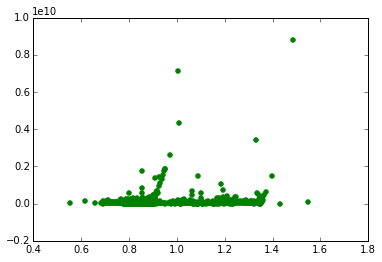

In [55]:
plt.scatter(startup_scores.as_matrix(), startup_funding.as_matrix(), color='g')

/Users/sachinkesiraju/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


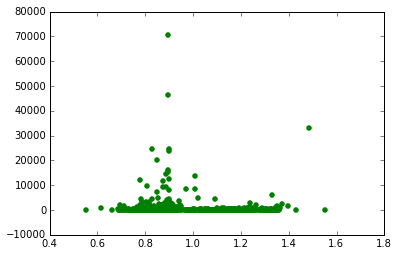

In [56]:
plt.scatter(startup_scores, startup_employees, color='g')

In [57]:
plotdata.describe()

,num_employees,crunchbase_rank,total_funding_amount,trend_score,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
count,1513.000000,1513.000000,1.513000e+03,1492.000000,1.513000e+03,1513.000000,1513.000000,1513.000000
mean,506.702578,7869.508262,1.004300e+08,-0.088204,9.222262e+07,2.156021,92.222617,0.939738
std,2862.365549,9534.912686,4.277330e+08,2.357321,3.644439e+08,1.961124,364.443911,0.166700
min,2.000000,6.000000,3.000000e+06,-9.300000,3.000000e+06,0.120000,3.000000,0.551000
25%,31.000000,1925.000000,1.170000e+07,-1.100000,1.150000e+07,0.760000,11.500000,0.832000
50%,81.000000,4402.000000,3.150000e+07,-0.500000,3.077037e+07,1.600000,30.770000,0.891000
75%,218.000000,9586.000000,7.701500e+07,0.200000,7.511397e+07,2.770000,75.114000,0.987000
max,70438.000000,53477.000000,1.156245e+10,9.600000,8.812450e+09,13.020000,8812.450000,1.550000


In [58]:
regressor.coef_

array([[  5.14938626e-11]])

In [59]:
regressor.intercept_

array([ 0.93498937])

In [60]:
rankedstartups[rankedstartups.past_companies.str.contains('Bridgewater')].head(10)

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
156,Addepar,272,"Addepar, SS&C Advent, Bridgewater Associates, ...","Stanford University, University of California ...",Financial Services,"Mountain View, California, United States",457,Series D,"$140,000,000",205839694,-3.5,"FinTech, Finance, SaaS",01/01/2009,06/08/2017,205839694,0.41,205.84,1.354
1863,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...","Information Technology, Software, Government a...","San Francisco, California, United States",31861,Series A,"$25,000,000",30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,0.47,30.50,1.348
1025,Clara Lending,72,"Bank of America, Bridgewater Associates, JPMor...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",4488,Series A,"$19,300,000",24300000,-1.1,"FinTech, Financial Services, Real Estate, Pers...",01/01/2014,08/17/2016,24300000,1.22,24.30,1.338
1886,Oscar,508,"Oscar Health, Google, Apple, Bridgewater Assoc...","Harvard University, New York University, Arizo...","Information Technology, Health Care, Financial...","New York, New York, United States",15388,Private Equity,"$400,000,000",727500000,-6.2,"Insurance, Information Technology, Health Care",07/01/2013,02/22/2016,727500000,1.70,727.50,1.192
414,Domino Data Lab,72,"Bridgewater Associates, FactSet, Platfora (Acq...","Massachusetts Institute of Technology, Univers...","Information Technology, Data and Analytics, So...","San Francisco, California, United States",1475,Series Unknown,"$27,000,000",40600000,-2.1,"Software, Data Mining, Analytics, Machine Lear...",01/01/2013,04/26/2017,40600000,0.53,40.60,0.912
1129,OpenInvest,14,"Bridgewater Associates, World Wildlife Fund, L...","The Johns Hopkins University, Cornell Universi...","Sustainability, Financial Services","San Francisco, California, United States",5285,Seed,"$3,250,000",3250000,-3.7,"FinTech, Financial Services, Sustainability",03/15/2015,05/16/2017,3250000,0.47,3.25,0.911
1686,Hubble Contacts,15,"Starbucks, Panaya, Hubble Contacts, Bridgewate...","Hunter College, Columbia University in the Cit...","Commerce and Shopping, Consumer Goods","New York, New York, United States",14501,Series A,"$10,000,000",33700000,2.1,"Eyewear, Consumer Goods, E-Commerce",05/01/2016,08/28/2017,33700000,0.19,33.70,0.899
985,Hello Alfred,47,"SoulCycle Inc., Bridgewater Associates, McKins...","New York University, Boston University, Harvar...","Consumer Electronics, Real Estate, Food and Be...","New York, New York, United States",4223,Series Unknown,NaN,12500000,-3.5,"Grocery, Home Services, Smart Home",01/01/2013,06/15/2017,12500000,0.39,12.50,0.898
1096,HealthSherpa,20,"Carter's | OshKosh B'gosh, HealthSTAR Communic...","California State University-Sacramento, Yale U...","Biotechnology, Science and Engineering, Health...","San Francisco, California, United States",5011,Series A,"$7,000,000",10000000,0.0,"Health Care, Biotechnology, Health Insurance",01/01/2013,02/01/2017,10000000,0.76,10.00,0.896


In [61]:
rankedstartups[rankedstartups.past_companies.str.contains('Clarium')].head()

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
5,Blend,260,"Blend, Palantir Technologies, Salesforce, Pand...","Stanford University, University of California ...","Real Estate, Financial Services","San Francisco, California, United States",179,Series D,"$100,000,000",160000000,8.3,"FinTech, Financial Services, Home Services, En...",05/01/2012,08/24/2017,160000000,0.20,160.0,1.353
1268,Artivest,39,"Artivest, Merrill Lynch, UBS, Clarium Capital ...","New York University, University of Virginia, Y...","Financial Services, Lending and Investments","New York, New York, United States",6256,Series A,"$15,000,000",17000000,-0.4,"FinTech, Wealth Management, Financial Services...",01/01/2011,05/04/2015,17000000,2.51,17.0,0.839


In [62]:
top_companies = rankedstartups[:200]
top_companies_past = []
for company in top_companies['past_companies']:
    top_companies_past.extend([s.strip() for s in company.split(',')])
Counter(top_companies_past).most_common(20)

[('Google', 56),
 ('Microsoft', 48),
 ('Stanford University', 33),
 ('Oracle', 26),
 ('University of California', 23),
 ('Apple', 23),
 ('IBM', 21),
 ('Cisco', 17),
 ('Facebook', 15),
 ('Salesforce', 13),
 ('Yahoo! Inc.', 13),
 ('Berkeley', 12),
 ('LinkedIn', 9),
 ('VMware', 9),
 ('Hewlett Packard Enterprise', 9),
 ('Twitter', 8),
 ('Amazon', 6),
 ('Davis', 6),
 ('Zynga', 6),
 ('Adobe', 5)]

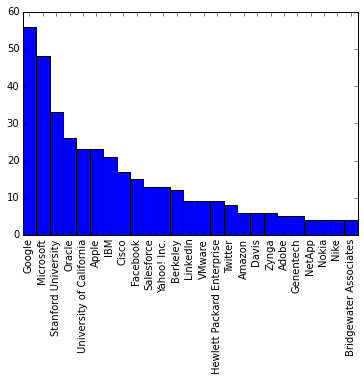

In [63]:
chart_most_common(top_companies_past)

In [64]:
top_companies_schools = []
for company in top_companies['past_schools']:
    top_companies_schools.extend([s.strip() for s in company.split(',')])
Counter(top_companies_schools).most_common(20)

[('Stanford University', 160),
 ('University of California Berkeley', 137),
 ('University of California Davis', 53),
 ('San Francisco State University', 44),
 ('San Jose State University', 32),
 ('University of California Los Angeles', 21),
 ('Carnegie Mellon University', 20),
 ('Massachusetts Institute of Technology', 20),
 ('University of California Santa Barbara', 18),
 ('University of Southern California', 17),
 ('Harvard University', 17),
 ('Santa Clara University', 15),
 ('California Polytechnic State University-San Luis Obispo', 13),
 ('Stanford University Graduate School of Business', 11),
 ('Cornell University', 11),
 ('University of California Santa Cruz', 10),
 ('University of Waterloo', 10),
 ('University of California San Diego', 10),
 ('University of Washington', 9),
 ('University of Pennsylvania', 9)]

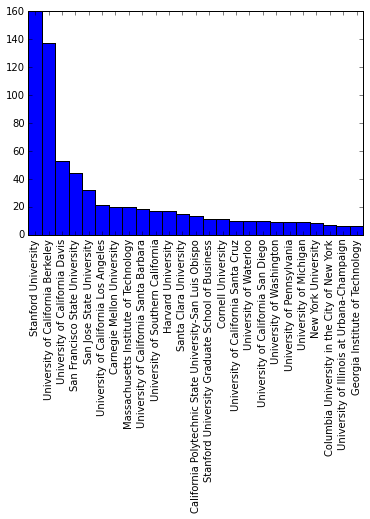

In [65]:
chart_most_common(top_companies_schools)

In [66]:
rankedstartups[240:242]

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
785,Transcriptic,37,"University of Pennsylvania, Brown University, ...","University of Pennsylvania, Massachusetts Inst...","Biotechnology, Science and Engineering, Hardwa...","Menlo Park, California, United States",3074,Series A,"$13,400,000",27770000,-0.5,"SaaS, Robotics, Biotechnology",02/14/2012,11/17/2016,27770000,0.96,27.77,1.118
937,Fundera,65,"Fundera, Yelp, Irwin Union Bank, LivingSocial,...","Columbia University in the City of New York, N...","Internet Services, Financial Services","New York, New York, United States",3952,Series B,"$15,500,000",18900000,-0.3,"Internet, Lending, Financial Services",10/01/2013,09/17/2015,18900000,2.13,18.90,1.117


In [67]:
rankedstartups[rankedstartups.categories.str.contains('GovTech', na=False)].head()

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
1771,OpenGov,154,"OpenGov Inc., IBM, Stanford University, Meltwa...","Stanford University, University of California ...","Information Technology, Data and Analytics, So...","Redwood City, California, United States",18222,Series C,"$30,000,000",77000000,-2.6,"SaaS, Data Visualization, Enterprise Software,...",01/01/2012,05/16/2017,77000000,0.47,77.00,1.350
1863,Neighborly,63,"Standish Mellon Asset Management Company LLC, ...","Stanford University, University of Missouri-Ka...","Information Technology, Software, Government a...","San Francisco, California, United States",31861,Series A,"$25,000,000",30675000,-2.8,"Finance, Software, Impact Investing, FinTech, ...",03/01/2012,05/17/2017,30500000,0.47,30.50,1.348
861,Mark43,110,"Dataminr, Mark43, Deloitte, S&P Global Market ...","Harvard University, The George Washington Univ...","Information Technology, Data and Analytics, So...","New York, New York, United States",3417,Series B,"$27,000,000",39825000,-0.8,"Software, GovTech, Law Enforcement, Analytics,...",02/01/2012,04/27/2016,39750000,1.52,39.75,1.179
163,Nextdoor,271,"Twitter, Nextdoor, Google, Yelp, eBay Advertising","University of California Berkeley, Stanford Un...","Media and Entertainment, Information Technolog...","San Francisco, California, United States",490,Series D,"$110,000,000",210200000,-3.3,"Social Media, Private Social Networking, GovTe...",01/01/2010,03/03/2015,210200000,2.68,210.20,1.176
534,Remix,114,"Microsoft, Code for America, LinkedIn, Omada H...","Massachusetts Institute of Technology, Brown U...","Information Technology, Government and Militar...","San Francisco, California, United States",1928,Series A,"$10,000,000",12000000,-3.7,"Public Transportation, Transportation, Informa...",10/31/2014,05/09/2017,12000000,0.49,12.00,0.898


In [71]:
rankedstartups[rankedstartups.headquarters_location.str.contains('New York', na=False)][40:60]

,company_name,num_employees,past_companies,past_schools,category_groups,headquarters_location,crunchbase_rank,last_funding_type,last_funding_amount,total_funding_amount,trend_score,categories,founded_date,last_funding_date,total_equity_funding_amount,time_since_last_funding,funding_ratio,score
203,SeatGeek,170,"SeatGeek, Time Inc., Etsy, UBS, Phoenix Suns","Dartmouth College, Stanford University, Columb...","Media and Entertainment, Events, Sports, Inter...","New York, New York, United States",650,Series D,"$57,000,000",159970000,-1.8,"Vertical Search, Search Engine, Concerts, Tick...",01/01/2009,04/18/2017,159970000,0.55,159.970,0.902
76,ClassPass,248,"ClassPass, Viacom, Bain & Company, Yelp, Sony ...","New York University, University of California ...","Apps, Software, Sports, Health Care","New York, New York, United States",174,Series C,"$70,000,000",154000000,-1.6,"Fitness, Consumer Applications, Health Care, S...",01/01/2013,06/16/2017,154000000,0.39,154.000,0.902
95,Artsy,225,"Artsy, Christie's, Sotheby's, New York Univers...","New York University, Columbia University in th...","Media and Entertainment, Internet Services, Co...","New York, New York, United States",244,Series D,"$50,000,000",100880053,4.6,"Art, Internet, Content Discovery",01/01/2009,07/18/2017,100880053,0.30,100.880,0.901
457,Freshly,106,"U-Haul International, Inc, Pixable, Robert Hal...","New York University, University of Arizona, Un...","Commerce and Shopping, Food and Beverage, Tran...","New York, New York, United States",1638,Series C,"$77,000,000",107000000,-3.1,"Internet, E-Commerce, Food Delivery",01/01/2012,06/20/2017,107000000,0.38,107.000,0.901
364,Signals Analytics,172,"Signals Analytics, Israel Defense Forces, Proc...","Tel Aviv University, The Hebrew University of ...","Science and Engineering, Data and Analytics, A...","New York, New York, United States",1193,Series C,"$25,000,000",55000000,6.9,"Product Design, Big Data, Intelligent Systems,...",01/01/2009,08/08/2017,55000000,0.24,55.000,0.900
229,Stash,82,"Stash Invest, Goldman Sachs, Voya Financial, M...","General Assembly, New York University, Brown U...",Financial Services,"New York, New York, United States",733,Series C,"$40,000,000",78750000,-0.3,"FinTech, Personal Finance, Financial Services",02/19/2015,07/13/2017,78750000,0.31,78.750,0.900
247,Bitly,170,"Bitly, Yahoo! Inc., Kennel Aire LLC, US Army, AOL","Skidmore College, Syracuse University, Carnegi...","Media and Entertainment, Data and Analytics, S...","New York, New York, United States",783,Private Equity,"$63,000,000",94400000,-3.6,"Social Media, Analytics, Brand Marketing, Publ...",01/01/2008,07/12/2017,91500000,0.32,91.500,0.900
1048,Pymetrics,40,"Google, LinkedIn, University of California, Me...","Tufts University, New York University, Univers...","Biotechnology, Science and Engineering, Profes...","New York, New York, United States",4688,Non-equity Assistance,NaN,8630000,-0.3,"Neuroscience, Recruiting",09/01/2013,12/16/2016,8630000,0.88,8.630,0.900
856,M.Gemi,63,"Rue La La, Zipcar, Birchbox, M.Gemi, Quidsi In...","Boston University, Harvard Business School, Fa...","Commerce and Shopping, Clothing and Apparel, D...","New York, New York, United States",3393,Series C,"$16,000,000",52000000,-1.8,"Retail, Fashion, E-Commerce",01/01/2014,06/20/2017,48000000,0.38,48.000,0.899
1686,Hubble Contacts,15,"Starbucks, Panaya, Hubble Contacts, Bridgewate...","Hunter College, Columbia University in the Cit...","Commerce and Shopping, Consumer Goods","New York, New York, United States",14501,Series A,"$10,000,000",33700000,2.1,"Eyewear, Consumer Goods, E-Commerce",05/01/2016,08/28/2017,33700000,0.19,33.700,0.899
